In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa import stattools
from math import sqrt

### WebScraping for Load data Collection from SLDC website

In [ ]:
import requests
import csv
import os
from bs4 import BeautifulSoup
from datetime import datetime, timedelta

def get_load_data(date):
    url = 'http://www.delhisldc.org/Loaddata.aspx?mode='
    print('Scraping', date)
    resp = requests.get(url+date) # send a get request to the url, get response
    soup = BeautifulSoup(resp.text, 'lxml') # HTML soup
    table = soup.find('table', {'id':'ContentPlaceHolder3_DGGridAv'}) # get the table from html
    trs = table.findAll('tr') # extract all rows of the table
    if len(trs[1:])!=0: # no need to create csv file, if there's no data
        csv_filename = 'DelhiData.csv'
        with open(csv_filename, 'a') as f:
            writer = csv.writer(f)
            count=0
            for tr in trs[1:]:
                time, delhi = tr.findChildren('font')[:2]
                writer.writerow([date+' '+time.text, delhi.text])
                count+=1
    if count != 288:
        print('Some of the load values are missing..')
    else:
        print('Done')

In [ ]:
import time
from datetime import datetime, timedelta

def scrape_from_2018():
    start_date = datetime.strptime('01/01/2018', '%d/%m/%Y')  # Start from 1st Jan 2018
    end_date = datetime.today()  # Up to today

    current_date = start_date
    while current_date <= end_date:
        try:
            formatted_date = current_date.strftime('%d/%m/%Y')
            get_load_data(formatted_date)
            time.sleep(2)  # Pause to avoid overloading the server
        except Exception as e:
            print(f"Error fetching data for {formatted_date}: {e}")

        current_date += timedelta(days=1)

scrape_from_2018()

Scraping 01/01/2018


<ipython-input-2-47b46c1230ff>:13: DeprecationWarning: Call to deprecated method findAll. (Replaced by find_all) -- Deprecated since version 4.0.0.
  trs = table.findAll('tr') # extract all rows of the table
<ipython-input-2-47b46c1230ff>:20: DeprecationWarning: Call to deprecated method findChildren. (Replaced by find_all) -- Deprecated since version 3.0.0.
  time, delhi = tr.findChildren('font')[:2]


Streaming output truncated to the last 5000 lines.
Scraping 22/05/2018
Done
Scraping 23/05/2018
Done
Scraping 24/05/2018
Done
Scraping 25/05/2018
Done
Scraping 26/05/2018
Done
Scraping 27/05/2018
Done
Scraping 28/05/2018
Done
Scraping 29/05/2018
Done
Scraping 30/05/2018
Done
Scraping 31/05/2018
Done
Scraping 01/06/2018
Done
Scraping 02/06/2018
Done
Scraping 03/06/2018
Done
Scraping 04/06/2018
Done
Scraping 05/06/2018
Done
Scraping 06/06/2018
Done
Scraping 07/06/2018
Done
Scraping 08/06/2018
Done
Scraping 09/06/2018
Done
Scraping 10/06/2018
Done
Scraping 11/06/2018
Done
Scraping 12/06/2018
Done
Scraping 13/06/2018
Done
Scraping 14/06/2018
Done
Scraping 15/06/2018
Done
Scraping 16/06/2018
Done
Scraping 17/06/2018
Done
Scraping 18/06/2018
Done
Scraping 19/06/2018
Done
Scraping 20/06/2018
Error fetching data for 20/06/2018: cannot access local variable 'count' where it is not associated with a value
Scraping 21/06/2018
Done
Scraping 22/06/2018
Done
Scraping 23/06/2018
Done
Scraping 24/06/2

### Weather Data Collection

In [2]:
import requests
import pandas as pd

# Coordinates for Delhi
latitude = 28.6139
longitude = 77.2090

# Time range
start_date = "2018-01-01"
end_date = "2025-03-25"

# API URL with additional features
url = (
    f"https://archive-api.open-meteo.com/v1/archive?"
    f"latitude={latitude}&longitude={longitude}"
    f"&start_date={start_date}&end_date={end_date}"
    f"&hourly=temperature_2m,relative_humidity_2m,precipitation,"
    f"windspeed_10m,winddirection_10m,cloudcover,pressure_msl,dew_point_2m"
    f"&timezone=Asia%2FKolkata"
)

# Make the request
response = requests.get(url)
data = response.json()

# Check if the request was successful and print any errors
if 'error' in data and data['error']:
    print(f"Error: {data['reason']}")
else:
    # Convert to DataFrame with more features
    df_weather = pd.DataFrame({
        'datetime': data['hourly']['time'],
        'temperature_2m': data['hourly']['temperature_2m'],
        'relative_humidity_2m': data['hourly']['relative_humidity_2m'],
        'precipitation': data['hourly']['precipitation'],
        'windspeed_10m': data['hourly']['windspeed_10m'],
        'winddirection_10m': data['hourly']['winddirection_10m'],
        'cloudcover': data['hourly']['cloudcover'],
        'pressure_msl': data['hourly']['pressure_msl'],
        'dew_point_2m': data['hourly']['dew_point_2m']
    })

    # Convert datetime to pandas datetime
    df_weather['datetime'] = pd.to_datetime(df_weather['datetime'])

    # Set index
    df_weather.set_index('datetime', inplace=True)

    # Save to CSV
    df_weather.to_csv('delhi_weather.csv')

    print("✅ Weather data for Delhi saved to 'delhi_weather.csv'")


✅ Weather data for Delhi saved to 'delhi_weather.csv'


### Load Data Preprocessing

In [4]:
import pandas as pd
# Load the dataset
df = pd.read_csv('DelhiData.csv')

In [5]:
df.describe()

,load
count,737916.000000
mean,3772.914971
std,1253.171856
min,1169.800000
25%,2918.307500
50%,3662.620000
75%,4640.732500
max,8631.530000


In [6]:
# Convert 'timestamp' to datetime with dayfirst=True
df['datetime'] = pd.to_datetime(df['timestamp'], dayfirst=True, errors='coerce')
# Rearrange columns for better readability
df = df[['datetime', 'load']]
# Display the first few rows to check the result
print(df.head())

             datetime     load
0 2018-01-01 00:00:00  1868.99
1 2018-01-01 00:05:00  1832.51
2 2018-01-01 00:10:00  1808.53
3 2018-01-01 00:15:00  1788.84
4 2018-01-01 00:20:00  1782.79


In [7]:
# Extract the date and hour from the timestamp
df['date'] = df['datetime'].dt.date
df['hour'] = df['datetime'].dt.hour

In [8]:
# Group by date and hour and count the number of entries in each group
period_counts = df.groupby(['date', 'hour']).size()
period_counts.head()

date        hour
2018-01-01  0       12
            1       12
            2       12
            3       12
            4       12
dtype: int64

In [9]:
# Check if all hours have exactly 12 periods
if all(period_counts == 12):
    print("Each hour has exactly 12 periods.")
else:
    print("There are some hours without exactly 12 periods.")
    print(period_counts)

There are some hours without exactly 12 periods.
date        hour
2018-01-01  0       12
            1       12
            2       12
            3       12
            4       12
                    ..
2025-03-25  15      12
            16      12
            17      12
            18      12
            19      10
Length: 61764, dtype: int64


In [10]:
# Keep only those (date, hour) pairs with exactly 12 periods
valid_periods = period_counts[period_counts == 12].index
# Filter original dataframe based on valid (date, hour) pairs
df_valid = df.set_index(['date', 'hour'])
df_valid = df_valid.loc[valid_periods]
df_valid = df_valid.reset_index()

In [11]:
df_valid.head()

,date,hour,datetime,load
0,2018-01-01,0,2018-01-01 00:00:00,1868.99
1,2018-01-01,0,2018-01-01 00:05:00,1832.51
2,2018-01-01,0,2018-01-01 00:10:00,1808.53
3,2018-01-01,0,2018-01-01 00:15:00,1788.84
4,2018-01-01,0,2018-01-01 00:20:00,1782.79


In [12]:
df = df_valid[['datetime', 'load']]
df.head()

,datetime,load
0,2018-01-01 00:00:00,1868.99
1,2018-01-01 00:05:00,1832.51
2,2018-01-01 00:10:00,1808.53
3,2018-01-01 00:15:00,1788.84
4,2018-01-01 00:20:00,1782.79


In [13]:
df = df[['datetime', 'load']].set_index('datetime')
df.head()

,load
datetime,
2018-01-01 00:00:00,1868.99
2018-01-01 00:05:00,1832.51
2018-01-01 00:10:00,1808.53
2018-01-01 00:15:00,1788.84
2018-01-01 00:20:00,1782.79


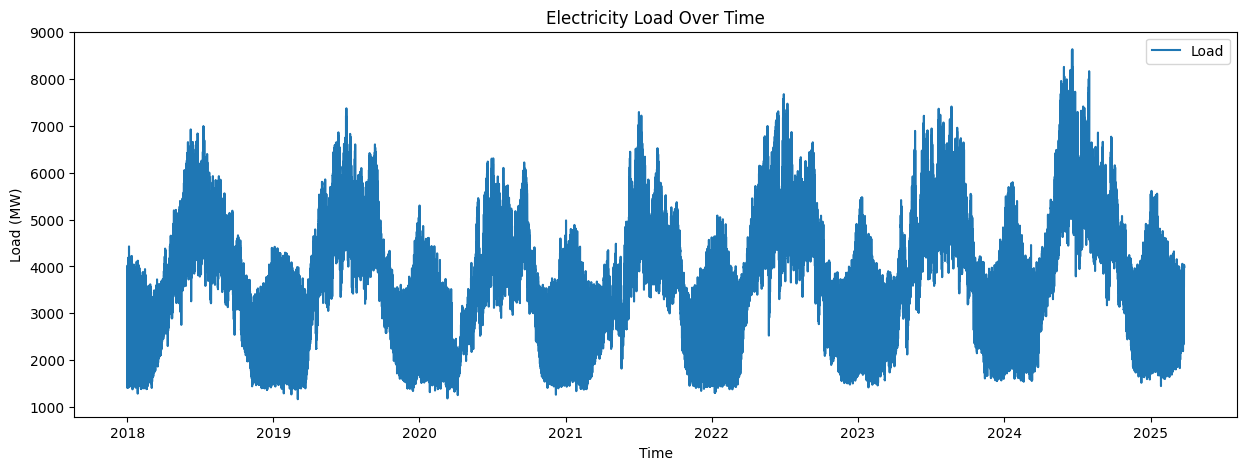

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
plt.plot(df['load'], label='Load')
plt.title("Electricity Load Over Time")
plt.xlabel("Time")
plt.ylabel("Load (MW)")
plt.legend()
plt.show()

In [15]:
df_hourly = df.resample('H').sum()
df_hourly.head()

<ipython-input-15-378631ee7b11>:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_hourly = df.resample('H').sum()


,load
datetime,
2018-01-01 00:00:00,20905.32
2018-01-01 01:00:00,18827.25
2018-01-01 02:00:00,17624.49
2018-01-01 03:00:00,17092.84
2018-01-01 04:00:00,17661.66


In [16]:
df_hourly.describe()

,load
count,63379.000000
mean,43245.036691
std,17284.739496
min,0.000000
25%,33653.300000
50%,43054.670000
75%,54973.485000
max,102781.620000


In [17]:
# Find timestamps where load is 0
zero_load_times = df_hourly[df_hourly['load'] == 0].index
# Print results
if len(zero_load_times) > 0:
    print("Timestamps with zero load:")
    print(zero_load_times)
else:
    print("✅ No zero-load timestamps found.")

Timestamps with zero load:
DatetimeIndex(['2018-01-04 23:00:00', '2018-03-05 22:00:00',
               '2018-03-05 23:00:00', '2018-03-20 22:00:00',
               '2018-03-20 23:00:00', '2018-05-18 22:00:00',
               '2018-05-18 23:00:00', '2018-06-20 00:00:00',
               '2018-06-20 01:00:00', '2018-06-20 02:00:00',
               ...
               '2025-03-17 23:00:00', '2025-03-19 23:00:00',
               '2025-03-20 22:00:00', '2025-03-20 23:00:00',
               '2025-03-21 22:00:00', '2025-03-21 23:00:00',
               '2025-03-22 22:00:00', '2025-03-22 23:00:00',
               '2025-03-24 22:00:00', '2025-03-24 23:00:00'],
              dtype='datetime64[ns]', name='datetime', length=2786, freq=None)


In [18]:
df_hourly['load'] = df_hourly['load'].replace(0, pd.NA)  # Convert 0s to NaN
df_hourly['load'] = df_hourly['load'].interpolate(method='time')  # Interpolate
df_hourly.head()

<ipython-input-18-c8d862f13439>:2: FutureWarning: Series.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_hourly['load'] = df_hourly['load'].interpolate(method='time')  # Interpolate


,load
datetime,
2018-01-01 00:00:00,20905.32
2018-01-01 01:00:00,18827.25
2018-01-01 02:00:00,17624.49
2018-01-01 03:00:00,17092.84
2018-01-01 04:00:00,17661.66


In [19]:
# Find timestamps where load is 0
zero_load_times = df[df['load'] == 0].index

# Print results
if len(zero_load_times) > 0:
    print("Timestamps with zero load:")
    print(zero_load_times)
else:
    print("✅ No zero-load timestamps found.")

✅ No zero-load timestamps found.


In [20]:
df_hourly.describe()

,load
count,60593.00
unique,60212.00
top,66768.24
freq,29.00


In [21]:
# Create a complete hourly range from min to max date
full_range = pd.date_range(start=df_hourly.index.min(), end=df_hourly.index.max(), freq='h')

# Find missing timestamps
missing = full_range.difference(df_hourly.index)

# Group missing timestamps by date
missing_by_day = pd.Series(missing).dt.date.value_counts().sort_index()

# Display missing hours for each day
print("Missing hours per day:")
print(missing_by_day)

Missing hours per day:
Series([], Name: count, dtype: int64)


In [ ]:
# Example: Find load at a specific timestamp
timestamp = pd.Timestamp("2018-01-04 23:00:00") 
load_at_time = df_hourly.loc[timestamp, 'load']

print(f"Load at {timestamp}: {load_at_time}")

Load at 2018-01-04 23:00:00: <NA>


In [23]:
# Check for missing values
print(df_hourly.isnull().sum())

load    2786
dtype: int64


In [24]:
# Drop rows with any NaN values
df_cleaned = df_hourly.dropna()

# Optional: Reset index if needed
df_cleaned.reset_index(inplace=True)

# Preview the cleaned dataset
print(df_cleaned.head())
print(f"Cleaned dataset shape: {df_cleaned.shape}")

             datetime      load
0 2018-01-01 00:00:00  20905.32
1 2018-01-01 01:00:00  18827.25
2 2018-01-01 02:00:00  17624.49
3 2018-01-01 03:00:00  17092.84
4 2018-01-01 04:00:00  17661.66
Cleaned dataset shape: (60593, 2)


In [25]:
# Assuming your cleaned DataFrame is named df_cleaned
df_cleaned.to_csv("hourly_load.csv", index=False)

print("✅ Hourly cleaned data saved as 'hourly_load.csv'")

✅ Hourly cleaned data saved as 'hourly_load.csv'


### Merging Load Data with Weather Data

In [29]:
# Load weather data
df_weather = pd.read_csv("/content/delhi_weather.csv", parse_dates=["datetime"])
# Load cleaned hourly load data
df_load = pd.read_csv("hourly_load.csv", parse_dates=["datetime"])

In [30]:
# Merge both DataFrames on 'datetime'
df_merged = pd.merge(df_load, df_weather, on="datetime", how="inner")

In [31]:
# Preview merged result
print(df_merged.head())
print(f"Merged shape: {df_merged.shape}")

# Save merged dataset
df_merged.to_csv("merged_hourly_load_weather.csv", index=False)
print("✅ Merged dataset saved as 'merged_hourly_load_weather.csv'")

             datetime      load  temperature_2m  relative_humidity_2m  \
0 2018-01-01 00:00:00  20905.32            11.4                    81   
1 2018-01-01 01:00:00  18827.25             9.5                    88   
2 2018-01-01 02:00:00  17624.49             8.6                    88   
3 2018-01-01 03:00:00  17092.84             8.2                    88   
4 2018-01-01 04:00:00  17661.66             7.9                    88   

   precipitation  windspeed_10m  winddirection_10m  cloudcover  pressure_msl  \
0            0.0            1.9                 22           0        1014.5   
1            0.0            9.5                245           0        1014.5   
2            0.0            6.0                253           0        1013.8   
3            0.0            7.3                261           0        1013.5   
4            0.0            8.0                275           0        1013.3   

   dew_point_2m  
0           8.3  
1           7.5  
2           6.8  
3       

In [32]:
# Check for missing values
print(df_merged.isnull().sum())

datetime                0
load                    0
temperature_2m          0
relative_humidity_2m    0
precipitation           0
windspeed_10m           0
winddirection_10m       0
cloudcover              0
pressure_msl            0
dew_point_2m            0
dtype: int64


In [33]:
df_merged.describe()

,datetime,load,temperature_2m,relative_humidity_2m,precipitation,windspeed_10m,winddirection_10m,cloudcover,pressure_msl,dew_point_2m
count,60593,60593.000000,60593.000000,60593.000000,60593.000000,60593.000000,60593.000000,60593.000000,60593.000000,60593.000000
mean,2021-07-24 02:02:44.395227136,45233.396274,24.398256,63.203786,0.082341,9.491156,212.129866,31.498374,1008.559688,15.329657
min,2018-01-01 00:00:00,14325.310000,2.400000,5.000000,0.000000,0.000000,1.000000,0.000000,987.900000,-7.100000
25%,2019-09-28 09:00:00,35124.610000,18.100000,45.000000,0.000000,6.200000,111.000000,0.000000,1002.200000,9.700000
50%,2021-06-25 03:00:00,43907.060000,25.900000,67.000000,0.000000,8.900000,261.000000,8.000000,1008.900000,14.100000
75%,2023-05-23 11:00:00,55622.980000,30.300000,83.000000,0.000000,11.900000,302.000000,68.000000,1014.900000,22.400000
max,2025-03-25 18:00:00,102781.620000,46.400000,100.000000,26.100000,37.900000,360.000000,100.000000,1027.800000,29.100000
std,NaN,14918.360016,8.268193,23.668065,0.576354,4.786790,105.202778,39.080175,7.353871,7.089513


In [34]:
df_merged['datetime'] = pd.to_datetime(df_merged['datetime'])
df_merged.set_index('datetime', inplace=True)

<Axes: title={'center': 'Electric Load Over Time'}, xlabel='datetime'>

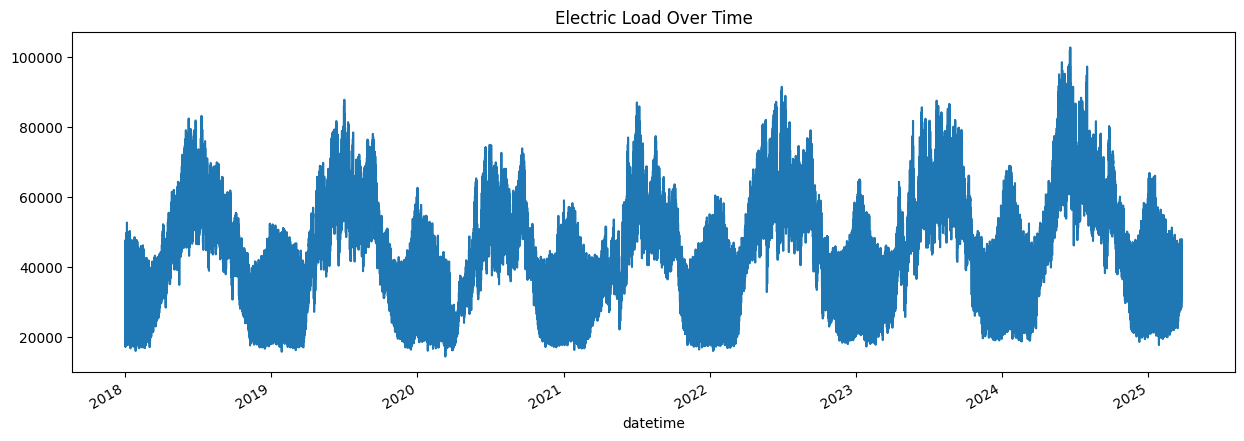

In [35]:
df_merged['load'].plot(figsize=(15, 5), title='Electric Load Over Time')

In [36]:
df=df_merged
df.head()

,load,temperature_2m,relative_humidity_2m,precipitation,windspeed_10m,winddirection_10m,cloudcover,pressure_msl,dew_point_2m
datetime,,,,,,,,,
2018-01-01 00:00:00,20905.32,11.4,81,0.0,1.9,22,0,1014.5,8.3
2018-01-01 01:00:00,18827.25,9.5,88,0.0,9.5,245,0,1014.5,7.5
2018-01-01 02:00:00,17624.49,8.6,88,0.0,6.0,253,0,1013.8,6.8
2018-01-01 03:00:00,17092.84,8.2,88,0.0,7.3,261,0,1013.5,6.3
2018-01-01 04:00:00,17661.66,7.9,88,0.0,8.0,275,0,1013.3,6.0


### Adding some more features

In [37]:
df['hour'] = df.index.hour
df['dayofweek'] = df.index.dayofweek
df['month'] = df.index.month
df["day_of_month"] = df.index.day
df["day_of_year"] = df.index.day_of_year
df["year"] = df.index.year
df["week_of_year"] = df.index.isocalendar().week.astype("int64")
df.head()

,load,temperature_2m,relative_humidity_2m,precipitation,windspeed_10m,winddirection_10m,cloudcover,pressure_msl,dew_point_2m,hour,dayofweek,month,day_of_month,day_of_year,year,week_of_year
datetime,,,,,,,,,,,,,,,,
2018-01-01 00:00:00,20905.32,11.4,81,0.0,1.9,22,0,1014.5,8.3,0,0,1,1,1,2018,1
2018-01-01 01:00:00,18827.25,9.5,88,0.0,9.5,245,0,1014.5,7.5,1,0,1,1,1,2018,1
2018-01-01 02:00:00,17624.49,8.6,88,0.0,6.0,253,0,1013.8,6.8,2,0,1,1,1,2018,1
2018-01-01 03:00:00,17092.84,8.2,88,0.0,7.3,261,0,1013.5,6.3,3,0,1,1,1,2018,1
2018-01-01 04:00:00,17661.66,7.9,88,0.0,8.0,275,0,1013.3,6.0,4,0,1,1,1,2018,1


Text(0.5, 1.0, 'Distribution of electricity consumption with hours')

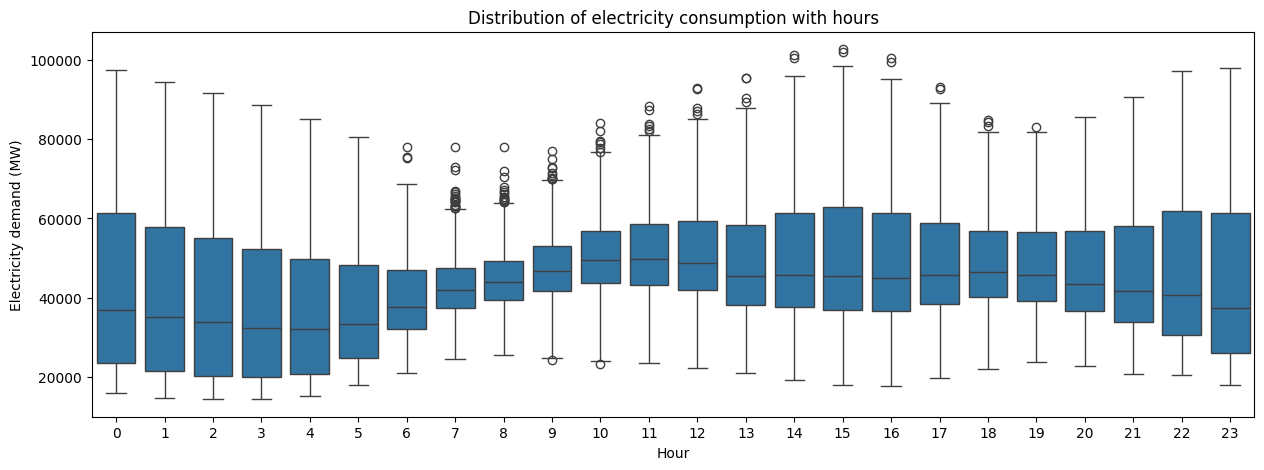

In [38]:
from matplotlib import rcParams
import seaborn as sns
fig, ax = plt.subplots(figsize=(15, 5))
sns.boxplot(x="hour", y="load", data=df)

# Set xticks for every hour (0 to 23)
ax.set_xticks(range(24))

# Set the corresponding xtick labels to the hours [0, 23]
ax.set_xticklabels(range(24))

ax.set_xlabel("Hour")
ax.set_ylabel("Electricity demand (MW)")
ax.set_title("Distribution of electricity consumption with hours")

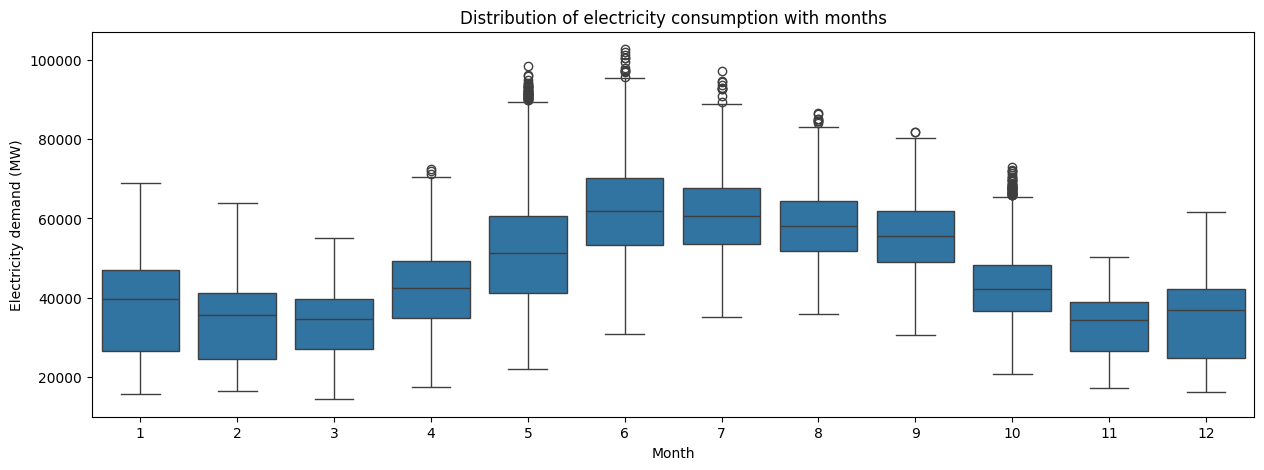

In [39]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.boxplot(x="month", y="load", data=df)

ax.set_xlabel("Month")
ax.set_ylabel("Electricity demand (MW)")
ax.set_title("Distribution of electricity consumption with months");